In this example, we will train a linear Koopman model using EDMD (see Williams, Kevrekidis & Rowley, “A Data–Driven Approximation of the Koopman Operator: Extending Dynamic Mode Decomposition”, Journal of Nonlinear Science 25, pp. 1307-1346, 2015) for a nonlinear, dynamical system. 

Load Data

In [21]:
from robot_tools import recorder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [22]:

data = recorder.json_process("data_2.json")
observation = np.array(data["observation"])
action = np.array(data["action"])
num = data["num"]
states = np.concatenate((observation, action), axis=1).T

n_states = 6  # Number of states, x y yaw ax ay ayaw
n_traj = 1  # Number of trajectories
n_int = num -1  # Integration length


In [23]:
data = recorder.json_process("data_sim_1.json")

observation = np.array(data["0"]["observation"])
action = np.array(data["0"]["action"])

states_no_control = observation.T
states_no_control_x = np.delete(states_no_control, -1, axis=1)
states_no_control_y = np.delete(states_no_control, 0, axis=1)
action_del = np.delete(action.T, -1, axis=1)
# print(states_no_control_x[:, 4:7])
for i in range(len(data) - 1):
    observation = np.array(data[str(i + 1)]["observation"])
    action = np.array(data[str(i + 1)]["action"])

    states_no_control__ = observation.T
    states_no_control_x__ = np.delete(states_no_control__, -1, axis=1)
    states_no_control_y__ = np.delete(states_no_control__, 0, axis=1)
    action_del__ = np.delete(action.T, -1, axis=1)
    states_no_control_x = np.concatenate(
        (states_no_control_x, states_no_control_x__), axis=1
    )
    states_no_control_y = np.concatenate(
        (states_no_control_y, states_no_control_y__), axis=1
    )
    action_del = np.concatenate((action_del, action_del__), axis=1)

n_states = 3  # Number of states, x y yaw ax ay ayaw
n_traj = 1  # Number of trajectories
n_int = num - 1  # Integration length
print(states_no_control_x[:, :3])
print(states_no_control_y[:, :3])
print(action_del[:, :3])
X = states_no_control_x
Y = states_no_control_y
U = action_del
assert len(X) == len(Y) == len(U), "Length of X, Y and U must be the same"

[[207.04348755 117.58218384  99.50003052]
 [127.30657959 119.78076172  73.5       ]
 [  0.36314698   0.35877071   0.        ]]
[[117.58218384  99.50003052  99.5       ]
 [119.78076172  73.5         73.5       ]
 [  0.35877071   0.           0.        ]]
[[0.         0.02070435 0.01175822]
 [0.02043355 0.         0.        ]
 [0.         0.         0.35877071]]


In [13]:
n_states = 3  # Number of states, x y yaw
states_no_control = observation.T
X = np.delete(states_no_control,-1,axis=1)
Y = np.delete(states_no_control,0,axis=1)
U = np.delete(action.T,-1,axis=1)

In [24]:
print(X[:,0:5])
print(Y[:,0:5])
print(U[:,0:5])

[[207.04348755 117.58218384  99.50003052  99.5        129.00003052]
 [127.30657959 119.78076172  73.5         73.5         31.50006104]
 [  0.36314698   0.35877071   0.           0.           0.        ]]
[[117.58218384  99.50003052  99.5        129.00003052  78.        ]
 [119.78076172  73.5         73.5         31.50006104  48.5       ]
 [  0.35877071   0.           0.           0.           0.        ]]
[[ 0.          0.02070435  0.01175822  0.         -0.00995   ]
 [ 0.02043355  0.          0.          0.          0.00735   ]
 [ 0.          0.          0.35877071 -0.         -0.        ]]


In [14]:
# 将X Y U归一化
# print(np.abs(U))
u_max = np.max(np.abs(U), axis=1, keepdims=True)
u_max[u_max == 0] = 1
x_max = np.max(np.abs(X), axis=1, keepdims=True)
x_max[x_max == 0] = 1
y_max = np.max(np.abs(Y), axis=1, keepdims=True)
y_max[y_max == 0] = 1
X = X/x_max
Y = Y/y_max
U = U/u_max
print(X[:,0:5])
print(Y[:,0:5])
print(U[:,0:5])


[[1.         0.56791056 0.48057551 0.48057537 0.62305766]
 [1.         0.9408843  0.57734644 0.57734644 0.24743467]
 [1.         0.98794903 0.         0.         0.        ]]
[[0.91148958 0.77131788 0.77131765 1.         0.60465102]
 [1.         0.61362108 0.61362108 0.26298097 0.40490642]
 [1.         0.         0.         0.         0.        ]]
[[ 0.          1.          0.56791056  0.         -0.48057537]
 [ 1.          0.          0.          0.          0.35970248]
 [ 0.          0.          1.         -0.         -0.        ]]


In [10]:
# states with u
X = np.delete(states,-1,axis=1)
Y = np.delete(states,0,axis=1)

print(X[:,0:3])
print(Y[:,0:3])

[[-6.2499939e+01 -4.2500000e+01 -2.2500000e+01]
 [-2.2499939e+01 -2.2000000e+01 -2.1999939e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -5.0000000e-03 -5.0000000e-03]
 [ 5.0000000e-03  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]
[[-4.2500000e+01 -2.2500000e+01 -2.2500000e+01]
 [-2.2000000e+01 -2.1999939e+01 -2.1999939e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-5.0000000e-03 -5.0000000e-03  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -1.5000000e-03]]


Text(0.5, 1.0, 'training data. num traj = 1, each traj time step = 199')

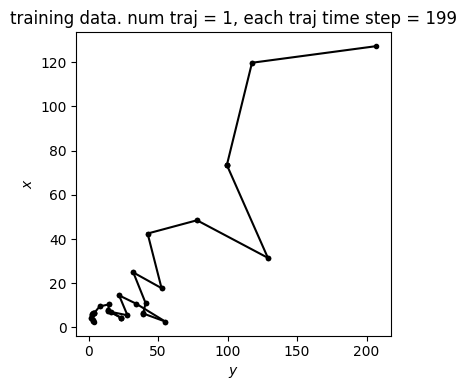

In [25]:
# Visualize some steps of the training data
num = 100
X_P = X[:2,:num]
Y_P = Y[:2,:num]

fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(4, 4))
for traj_idx in range(n_traj):
    axs.plot(
        [X_P[0, traj_idx::n_traj], Y_P[0, traj_idx::n_traj]],
        [X_P[1, traj_idx::n_traj], Y_P[1, traj_idx::n_traj]],
        "-ok",
        markersize=3,
    )
axs.set(ylabel=r"$x$", xlabel=r"$y$")
axs.set_title(
    "training data. num traj = {}, each traj time step = {}".format(n_traj, n_int)
)

In [26]:
import pykoopman as pk
import warnings
np.random.seed(42)  # for reproducibility
warnings.filterwarnings("ignore")
from pykoopman.regression import EDMD, EDMDc
from pykoopman.observables import RadialBasisFunction, Polynomial

Koopman regression using EDMD

In [27]:
EDMD_ = EDMD()
rbf_type = "thinplate"  # 'thinplate' polyharmonic gauss
RBF = RadialBasisFunction(rbf_type=rbf_type, n_centers=20,
                                         centers=None, kernel_width=1.0,
                                         polyharmonic_coeff=1.0, include_state=True)
model = pk.Koopman(observables=RBF, regressor=EDMD_)
# 拟合
model.fit(X.T, y=Y.T)

Koopman(observables=RadialBasisFunction(centers=array([[7.81368168e+01, 2.02887358e+02, 1.55531047e+02, 1.26661877e+02,
        3.08235680e+01, 3.08183457e+01, 9.61913366e+00, 1.84583550e+02,
        1.27193753e+02, 1.50351705e+02, 1.50000000e+00, 2.07043488e+02,
        1.77279730e+02, 4.30178129e+01, 3.64110333e+01, 3.67530284e+01,
        6.29162494e+01, 1.10660950e+02, 9.05658573e+01, 6.0098713...
       [3.40353523e-02, 1.78929223e-01, 0.00000000e+00, 3.39745717e-01,
        8.71336835e-02, 2.43911281e-01, 1.07687412e-01, 1.88594716e-01,
        1.98940200e-01, 5.84275849e-02, 3.63146982e-01, 2.87639198e-01,
        3.51464377e-01, 3.34117905e-01, 2.18817726e-01, 3.44620509e-01,
        2.10091736e-02, 6.27488683e-02, 4.20881330e-03, 1.12975919e-01]]),
                                        n_centers=20, rbf_type='thinplate'),
        regressor=EDMD())

In [ ]:
# Polynomial basis functions
EDMD_ = EDMD()
POLY = Polynomial(degree=2)
model = pk.Koopman(observables=POLY, regressor=EDMD_)
model.fit(X.T, y=Y.T)

In [28]:
from pykoopman.regression import EDMDc
EDMDc_ = EDMDc()
rbf_type = "thinplate"  # 'thinplate' polyharmonic gauss invquad invmultquad
RBF = RadialBasisFunction(rbf_type=rbf_type, n_centers=10, centers=None, kernel_width=1.0, polyharmonic_coeff=1.0, include_state=True)

model = pk.Koopman(observables=RBF, regressor=EDMDc_)
model.fit(X.T, y=Y.T, u=U.T)

Koopman(observables=RadialBasisFunction(centers=array([[7.22707091e+01, 4.58374086e+01, 1.71413441e+02, 6.50784459e+01,
        4.79969550e+01, 1.06970151e+02, 1.64535401e+01, 1.65434031e+02,
        1.50000000e+00, 2.07043488e+02],
       [1.20656093e+02, 3.23973580e+01, 2.66735840e+00, 1.27306580e+02,
        1.10593811e+02, 1.14002383e+02, 1.20506142e+02, 1.32120933e+01,
        5.69808313e+01, 1.96483306e+01],
       [3.52517250e-01, 2.46787745e-01, 1.17869336e-01, 0.00000000e+00,
        1.09088556e-01, 1.15349739e-01, 2.93658676e-01, 2.53074652e-01,
        3.63146982e-01, 1.80175573e-01]]),
                                        rbf_type='thinplate'),
        regressor=EDMDc())

In [372]:
from pykoopman.regression import EDMDc
EDMDc_ = EDMDc()
POLY = Polynomial(degree=4)
model = pk.Koopman(observables=POLY, regressor=EDMDc_)
model.fit(X.T, y=Y.T, u=U.T)

Koopman(observables=Polynomial(degree=4), regressor=EDMDc())

Prediction

In [31]:
# prepare starting point and true trajectory
start = 0
x0 = X[:, start]
lenth = 10
t = np.arange(0, lenth, 1)
end = start + lenth
Xtrue = X[:, start : start + end].T
# print(x0)
# print(Xtrue)

In [ ]:
# Simulate (multi-step prediction) Koopman model
Xkoop = model.simulate(x0[np.newaxis, :], n_steps=len(t)-1)
Xkoop = np.vstack([x0[np.newaxis,:], Xkoop])  # add initial point
print(x0[np.newaxis, :])
print(Xkoop)

In [32]:
# Simulate (multi-step prediction) Koopman model
Xkoop = model.simulate(x0[np.newaxis, :], U.T, n_steps=len(t)-1)
Xkoop = np.vstack([x0[np.newaxis,:], Xkoop])  # add initial point
print(x0[np.newaxis, :])
print(Xkoop)

[[207.04348755 127.30657959   0.36314698]]
[[ 2.07043488e+02  1.27306580e+02  3.63146982e-01]
 [ 1.17621621e+02  1.19755362e+02  3.58798474e-01]
 [ 1.02367477e+02  7.24634821e+01 -2.25955625e-04]
 [ 1.81947650e+02  4.51935263e+01 -1.03990977e-02]
 [ 1.32916025e+02  5.13812312e+01  1.98032754e-01]
 [ 3.72008407e+02 -4.03392615e+01 -4.10841853e-02]
 [-1.34199335e+03  4.93590102e+02  2.35083608e+00]
 [-1.05835348e+05  4.58384903e+04  2.43269657e+01]
 [-9.26185226e+08  3.93306896e+08  2.88355437e+05]
 [-1.25056827e+17  5.30766211e+16  3.91604122e+13]]


[Text(0, 0.5, '$x_3$'), Text(0.5, 0, '$t$')]

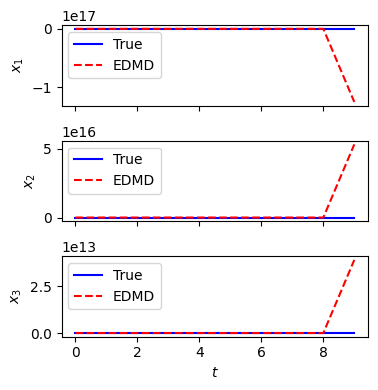

In [33]:
num_f = 3
fig, axs = plt.subplots(num_f, 1, sharex=True, tight_layout=True, figsize=(4, 4))
for i in range(num_f):
    axs[i].plot(t, Xtrue[:, i], "-", color="b", label="True")
    axs[i].plot(t, Xkoop[:, i], "--r", label="EDMD")
    axs[i].legend(loc="best")
axs[0].set(ylabel=r"$x_1$")
axs[1].set(ylabel=r"$x_2$")
axs[2].set(ylabel=r"$x_3$", xlabel=r"$t$")

In [397]:
# Init
Xk = np.zeros((n_states, n_int*n_traj))
Yk = np.zeros((n_states, n_int*n_traj))
# 1-step prediction using Koopman model
x = x0[np.newaxis, :]
print(x)

[[207.04348755 127.30657959   0.36314698]]


In [399]:
for k in range(30):
    yT = model.predict(x, U[:, k])
    y = yT.T
    Xk[:, k*n_traj:(k+1)*n_traj] = x.T
    Yk[:, k*n_traj:(k+1)*n_traj] = y
    x = y.T

In [400]:
print(X[:,0:3])
print(Xk[:,0:3])

[[207.04348755 117.58218384  99.50003052]
 [127.30657959 119.78076172  73.5       ]
 [  0.36314698   0.35877071   0.        ]]
[[2.14520809e+01 2.13411700e+01 2.11613515e+01]
 [4.95060970e+00 4.93265026e+00 4.98983685e+00]
 [2.78268208e-03 2.73295619e-03 2.67415507e-03]]


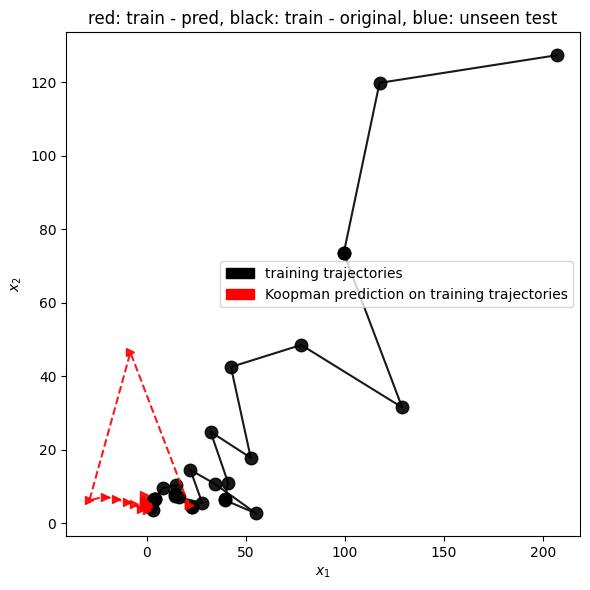

In [401]:
end = 30
X_E = X[:, :end]
Y_E = Y[:, :end]
Xke = Xk[:, :end]
Yke = Yk[:, :end]
fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(6, 6))
legend_list = ['training - true', 'training - pred']
for traj_idx in range(n_traj):
    # label = legend_list[0] if traj_idx == 0 else None
    axs.plot(X_E[0, traj_idx::n_traj],
             X_E[1, traj_idx::n_traj],'-ok',alpha=0.9,markersize=9)
    # label = legend_list[1] if traj_idx == 0 else None
    axs.plot(Xke[0, traj_idx::n_traj],
             Xke[1, traj_idx::n_traj], '-->r',alpha=0.9)
axs.set(ylabel=r'$x_2$',
        xlabel=r'$x_1$')

# axs.plot(Xtrue[:,0], Xtrue[:,1],'-^b')
# axs.plot(Xkoop[:,0], Xkoop[:,1],'->c')

# axs.scatter(x0[0],x0[1],s=50,c='b',label='unseen test')
axs.set_title('red: train - pred, black: train - original, blue: unseen test')

red_patch = mpatches.Patch(color='black', label='training trajectories')
black_patch = mpatches.Patch(color='red', label='Koopman prediction on training trajectories')
# blue_patch = mpatches.Patch(color='blue', label='unseen testing trajectory')
# cyan_patch = mpatches.Patch(color='cyan', label='Koopman prediction on unseen testing trajectory')

# axs.legend(handles=[red_patch, black_patch, blue_patch, cyan_patch],loc='best', )
axs.legend(handles=[red_patch, black_patch],loc='best', )

In [ ]:
end = 10
fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(6, 6))
legend_list = ['training - true', 'training - pred']
for traj_idx in range(n_traj):
    # label = legend_list[0] if traj_idx == 0 else None
    axs.plot([X[0, traj_idx::n_traj], Y[0, traj_idx::n_traj]],
             [X[1, traj_idx::n_traj], Y[1, traj_idx::n_traj]],'-ok',alpha=0.9,markersize=9)
    # label = legend_list[1] if traj_idx == 0 else None
    axs.plot([Xk[0, traj_idx::n_traj], Yk[0, traj_idx::n_traj]],
             [Xk[1, traj_idx::n_traj], Yk[1, traj_idx::n_traj]], '-->r',alpha=0.9)
axs.set(ylabel=r'$x_2$',
        xlabel=r'$x_1$')

# axs.plot(Xtrue[:,0], Xtrue[:,1],'-^b')
# axs.plot(Xkoop[:,0], Xkoop[:,1],'->c')

axs.scatter(x0[0],x0[1],s=50,c='b',label='unseen test')
axs.set_title('red: train - pred, black: train - original, blue: unseen test')

red_patch = mpatches.Patch(color='black', label='training trajectories')
black_patch = mpatches.Patch(color='red', label='Koopman prediction on training trajectories')
# blue_patch = mpatches.Patch(color='blue', label='unseen testing trajectory')
# cyan_patch = mpatches.Patch(color='cyan', label='Koopman prediction on unseen testing trajectory')

# axs.legend(handles=[red_patch, black_patch, blue_patch, cyan_patch],loc='best', )
axs.legend(handles=[red_patch, black_patch],loc='best', )

Test

In [51]:
# x0 = [0.6, -0.6]
from pykoopman.common import rev_dvdp  # discrete-time, reverse-time van der Pol

dT = 0.1
x0 = np.array([0.5, -0.75])
T = 10
t = np.arange(0, T, dT)

# Integrate
Xtrue = np.zeros((len(t), n_states))
Xtrue[0, :] = x0
for step in range(len(t) - 1):
    y = rev_dvdp(0, Xtrue[step, :][:, np.newaxis], 0, dT)
    Xtrue[step + 1, :] = y.ravel()

print(x0)
print(x0[np.newaxis, :])

[ 0.5  -0.75]
[[ 0.5  -0.75]]
